# Model traing for Iris-Dataset based on Adaline-Algorithm 

This example of a classifier  for the Iris dataset is provided by Sebastian Raschka in chapter 3 of his book "Machine Learining mit Python"

## Import and load of Iris dataset

In [15]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))


Class labels: [0 1 2]


## Data pre-processing
- Train-Test-Split
- Normalization with StandardScalar

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# standardize the features
# StandardScaler is a class that is used to standardize the dataset
sc = StandardScaler()
sc.fit(X_train) # estimate the sample mean and standard deviation for each feature dimension
# The transform method is then used to standardize the training data using those estimated parameters
X_train_std = sc.transform(X_train) # standardize the training data
X_test_std = sc.transform(X_test) # standardize the test data

## Model training

Model Training using (custom) Logistic Regression Algorithm based on Adaline algorithm

When fitting a logistic regression model based on Adaline algorithm, one must remember that it is only suitable for binary classification tasks. So only Iris setosa and Iris versicolor are considered for training (classes 0 and 1).

In [19]:
from logistic_regression_gd import LogisticRegressionGD  # Adjust the import path if necessary

X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)] # select only the samples with class labels 0 and 1
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)] # select only the samples with class labels 0 and 1

# The LogisticRegressionGD class is a simple implementation of logistic regression using gradient descent
lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

## Visualisierung der Ergebnisse

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt 

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0], X_test[:, 1],
                    facecolors='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='test set')

C:\Users\weber\AppData\Local\Temp\ipykernel_12328\2412815509.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


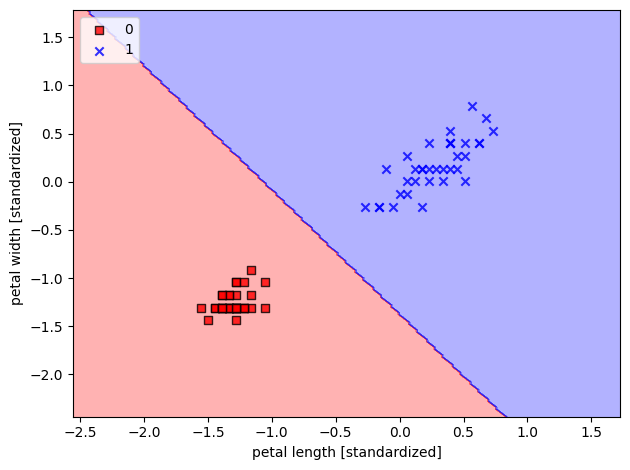

In [ ]:
plot_decision_regions(X=X_train_01_subset, 
                      y=y_train_01_subset,
                      classifier=lrgd)


plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_05.png', dpi=300)
plt.show()